Machine Leaning models 🤖

*contact :mehdi.zouitine@irt-saintexupery.com*

# Labs 2: Machine Leaning models

The last exercises of the session will be devoted to the implementation of more complex models and the use of a two in order to solve a task on a real dataset.



The objectives of this lab: **Discover, use and implement from scratch many classical machine learning algorithms !**

Note that in machine learning and in informatic in general, when you do not know how to do something or how does something work, your first reflex should be to look on **the documentation** and more generally on internet. First, all the documentation of the libraries you will use is there. Moreover, Python has a huge community (one of its strength) and therefore a lot of trouble you may have has already been resolved on a forume (such as StackOverflow). 

**However**, you should know that code you found on forum might be under some copyrights it is the case for instance on all the code avaible on StackOverflow

To find the documentation on a class, a function or a method from a library, most of the time, searching the name of the library and the name of the method will give you the documentation as the first link.

In [1]:
from typing import Protocol, Tuple, List #Typing library : In python the types of variables
# are not declared explicitly.
#However, it is sometimes useful to specify them to improve the readability of the code. 

In [2]:
import math

In [3]:
import numpy as np 

In [4]:
import seaborn as sns
sns.set() # graphical library

In [22]:
# Scikit learn is the reference library in python for using machine learning models (mainly on tabular data)
import sklearn
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
import matplotlib.pyplot as plt
# can use named colors or HTML codes
colormap = np.array(['red', 'lightseagreen', '#F39C12'])
cmap = sns.dark_palette((200, 1000,45), input="husl",as_cmap=True)

## 1.0 Tutorial

This first exercise has two purposes: 

- To introduce you to the notion of class with a data science-oriented practical case

- To see under the hood the notion of data scaling


Many normalization methods are possible, but in 99% of the use cases.
you will use the `MinMaxScaler`: $$Z= \frac{X - \bar{X}}{\sigma(X)}$$ or `StandardScaler`: $$S = \frac{X - \min(X)}{\max(X) - \min(X)}$$.
The first set your data between 0 and 1 and the second to mean 0 and standard deviation 1. 

Why should you scale your data?

Scale effects can interfere with the training of many estimators. It is necessary to scale the data where the estimator uses distance or gradient during training.

Advice: always normalize your data except if you want to use an algorithm based on decision trees

<div class="alert alert-block alert-info">
    
<b> Exercise 1.0.1 : </b>

Implement the two normalization methods using the object formalism.


</div>

In [70]:
class Normalizer:
    def __init__(self):
        self.mean = None
        self.std = None
        self.epsilon = 1e-6
    
    def fit(self, X: np.array, y=None): # y=None is a scikit learn convention
        # Compute the mean for each columns
        self.mean = X.mean(axis=0)
        # Compute the standard deviation for each columns
        self.std = X.std(axis=0)
        return self
    
    def transform(self, X: np.ndarray) -> np.ndarray:
        X_norm = (X - self.mean)/self.std # safe division
        return X_norm

In [71]:
class MinMaxNormalizer:
    def __init__(self):
        self.min = None
        self.max = None
        self.epsilon = 1e-6
    
    def fit(self, X, y=None):
        # the floor is yours
        self.min = X.min(axis=0)
        self.max = X.max(axis=0)
    
    def transform(self, X:np.ndarray) -> np.ndarray:
        # (X - X_min) / (X_max - X_min) 
        X_norm = (X - self.min)/(self.max - self.min) # safe division
        return X_norm

## 1.1 Generate the toy dataset

In [72]:
from sklearn.metrics import mean_squared_error, accuracy_score

def eval_model(Y_pred:np.ndarray, Y_true:np.ndarray, classification:bool=True):
    metric = accuracy_score if classification else mean_squared_error
    score = metric(Y_true, Y_pred)
    return f"The score is {score:.2f}"

In [73]:
def generate_classification_dataset(mode: str = "train") -> Tuple[np.ndarray, np.ndarray]:
    random_state = 42 if mode == "train" else 1337
    X, y = make_moons(n_samples=1000,random_state=random_state, noise=0.20)
    return X, y
        

In [74]:
def generate_regression_dataset(mode: str = "train") -> Tuple[np.ndarray, np.ndarray]:
    random_state = 42 if mode == "train" else 1337
    np.random.seed(random_state)
    X_1 = np.random.uniform(size = 1000, low = 0, high = 25)
    X_2 = np.random.uniform(size = 1000, low = 0, high = 8)
    gaussian_noise = np.random.normal(loc=0, scale=4, size=1000)
    Y = 2 * X_1 - 3 * X_2 + gaussian_noise
    X = np.stack([X_1, X_2], axis =-1)
    return X, Y

<div class="alert alert-block alert-info">
    
<b> Exercise 1.1.1 : </b>

Using the previous functions : Generate a train and test dataset for the two types of task (classification and regression)


</div>

In [75]:
# Generate
X_train_clf, Y_train_clf = generate_classification_dataset(mode="train")
X_test_clf, Y_test_clf = generate_classification_dataset(mode="test")

X_train_reg, Y_train_reg = generate_regression_dataset(mode="train")
X_test_reg, Y_test_reg = generate_regression_dataset(mode="test")



In [76]:
# Normalising using function above
normalizer = Normalizer() # Permet de crée l'objet

normalizer.fit(X_train_clf)
X_train_clf_norm = normalizer.transform(X_train_clf)
X_test_clf_norm = normalizer.transform(X_test_clf)

normalizer.fit(X_train_reg)
X_train_reg_norm = normalizer.transform(X_train_reg)
X_test_reg_norm = normalizer.transform(X_test_reg)

In [77]:
def plot_dataset(X:np.ndarray, Y: np.ndarray, colormap: np.ndarray = colormap,classification=True) -> None:
    if classification:
        plt.scatter(X[:, 0], X[:, 1], color=colormap[Y],s=10)
    else:
        
        points = plt.scatter(X[:, 0], X[:, 1], c=Y, s=15, cmap=cmap)
        plt.colorbar(points)

<div class="alert alert-block alert-info">
    
<b> Exercise 1.1.3 : </b>

Briefly explain this dataset (features and the machine learning task to be performed).


</div>

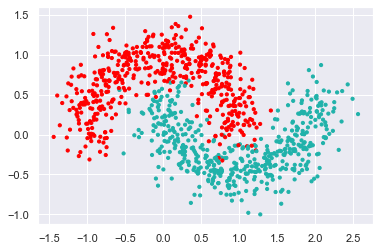

In [78]:
plot_dataset(X=X_train_clf, Y=Y_train_clf, colormap=colormap)

<div class="alert alert-block alert-info">
    
<b> Exercise 1.1.4 : </b>

Briefly explain the dataset (features and the machine learning task to be performed).


</div>

/var/folders/_g/mr5vkh2d5m777b8092y3412r0000gn/T/ipykernel_39955/492148471.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(points)


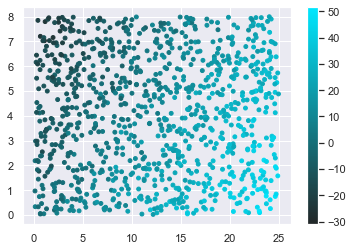

In [65]:
plot_dataset(X=X_train_reg, Y=Y_train_reg, colormap=colormap,classification=False)

## 1.2 General information on machine learning models

It is possible to implement a machine learning model in many ways. However, there are **code standards** that allow for readability and understanding by all. It is common to implement a machine learning model with the sklearn framework. We will ask you to implement your methods in the form of a **python class** with at least two methods: the **fit** method and the **predict** method.

In [ ]:
class MachineLearningModel(Protocol): 
    def fit(self, X:np.ndarray, y:np.ndarray, *args, **kwargs):
        ...
    def predict(X: np.ndarray, *args, **kwargs) -> np.ndarray:
        ...

In [ ]:
import abc # abstract class

class AibtMachineLearningModel(abc.ABC):
    
    @abc.abstractmethod
    def fit(self, X: np.ndarray, y: np.ndarray) -> "AibtMachineLearningModel":
        raise NotImplementedError("You should implement fit method")
    
    @abc.abstractmethod
    def predict(self, X:np.ndarray) -> np.ndarray:
        raise NotImplementedError("You should implement predict method")

In [ ]:
def plot_decision_boundaries(X: np.ndarray, Y: np.ndarray, classifier: MachineLearningModel):
    # Plotting decision regions
    f = plt.figure()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plot_dataset(X=X, Y=Y)
    plt.show()

A machine learning model is a function  $f_\theta$ parametrized by a set of parameters $\theta$.
    
* Train a model means : Find the best $\theta$ parameters $\theta^*$ that minimize a given loss function $\mathcal{L}$.


* The loss function $\mathcal{L}$ allows to evaluate the prediction error of the model with respect to a ground truth or label $y$ :  $$err(y,\hat{y}) = \mathcal{L}(y,f_\theta(x))$$


* These theta parameters can be found iteratively by following the opposite direction of the gradient of the loss function.
\begin{equation}
\theta_{i+1}=\theta_{i}-\tau_{i} \nabla \mathcal{L}\left(\theta_{i}\right)
\end{equation}



<img src="./images/ball.png" alt="tree" width="600"/>
source:rasbt

<div class="alert alert-block alert-warning">
    
<b> Example : </b>
Let's imagine that we want to train a model to predict the life expectancy $y$ according to some biological data $x$ : age, weight, height, blood profile ...
We have to find by training the set of parameters $\theta$ of our model $f_\theta$ which minimizes the prediction error. This error is defined as the distance between the predicted life expectancy $\hat{y}$ and the true life expectancy $y$ : 
    
$$err(y,\hat{y}) = \mathcal{L}(y,f_\theta(x))$$ with : $$\mathcal{L}(y,\hat{y}) = \Vert y - \hat{y} \Vert_2$$ (MSE loss)
   

## 1.3 Machine learning models implementation

### 1.3.1 A first classification model: Logistic regression

The logistic regression model is the basic model in binary classification. It has the advantage of being very simple and easily explained. Despite its simplicity, it is widely used, especially in the banking world.
\begin{equation}
S\left(X^{(i)}\right)=\theta_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}+\theta_{3} x_{3}+\ldots .+\theta_{n} x_{n} = \sum_{i=0}^{n+1}\left(\theta_{i} x_{i}\right) = \Theta X^{(i)}
\end{equation}
with $\theta_i \in \mathbf{R}$ for all $i \in 1,2,\ldots,n$.

$\Theta$ is the vector of parameters to be estimated and $S$ is called the score function.
The idea of the logistic regression is to find coefficients $\theta_1,\theta_2,\ldots,\theta_n$ such that 
* $S\left(X^{(i)}\right)>0$ when the label of $i$ is $1$.
* $S\left(X^{(i)}\right)<0$ when the label of $i$ is $0$.

However, a classification model should return a probability of belonging to a class and not a score.
To go from a score function to a probability we will use the logistic function (or sigmoid) : 

\begin{equation}
\operatorname{Sigmoid}(x)= \sigma(x)=\frac{1}{1+e^{-x}}
\end{equation}
The probability that individual $i$ belongs to class $1$ is therefore modeled by :

\begin{equation}
P(y=1 \mid X^{(i)} , \Theta) = \sigma(S\left(X^{(i)}\right))
\end{equation}
\begin{equation}
P(y=0 \mid X^{(i)} , \Theta) = 1-P(y=1 \mid X^{(i)} , \Theta) = 1 - \sigma(S\left(X^{(i)}\right))
\end{equation}

In practice if $X$ is the sample matrix, $\Theta$ the parameters vector and $\sigma$ the sigmoid function.
So, the logistic model is defined as :

<span style="color:red"> $$M(X,\Theta) = \sigma(X \Theta) $$</span>

The best $\theta$ parameters can be found iteratively by following the opposite direction of the gradient of the loss function defined as follow :

\begin{equation}
L_{\mathrm{CE}}(\hat{y}, y)=-\log p(y \mid x)=-[y \log \hat{y}+(1-y) \log (1-\hat{y})]
\end{equation}
this loss is called the cross-entropy.

\begin{equation}
L_{\mathrm{CE}}(\hat{y}, y)=-[y \log \sigma(\theta \cdot x)+(1-y) \log (1-\sigma(\theta \cdot x))]
\end{equation}

<span style="color:blue">\begin{equation}
\frac{\partial L_{\mathrm{CE}}(\hat{y}, y)}{\partial \theta}=[y-\sigma(\theta \cdot x)] x=[y-\hat{y}] x
\end{equation}</span>

**The gradients are noted in a vector manner to facilitate the transition to the implementation**.

<div class="alert alert-block alert-warning">

<b> Note : </b>
    In machine learning, understanding the dimension of tensors is essential. This allows to better understand the algorithms. Knowing the dimensions in Machine Learning is a bit like dimensional analysis in physics. If I know the shape of my tensors and the operations I perform then I can understand the output shape.

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.1.1 : </b>

What is the dimension $X$, $\Theta$ and the output $\hat{y}$ of the model ?


</div>

La dimension de X est de n
La dimension de Θ est de n + 1
La dimension de y est 1

#### Sklearn logistic regression

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.1.2 : </b>

1. Train a sklearn logistic regression model on the train data. 

2. Display the decision boundaries.

3. Evaluate the model on the test data using the `eval_model` method defined above.

4. Try to get the best score and the most beautiful decision boundaries.


</div>

In [ ]:
# Write your solution here

#### Homemade logistic regression

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.1.3 : </b>

Implement logistic regression from scratch.


</div>

In [ ]:
# exercice
class Sigmoid:
    def __call__(self,x):
        return ...
class HomemadeLogisticRegression(AibtMachineLearningModel):
    """ Logistic Regression classifier.
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    gradient_descent: boolean
        True or false depending if gradient descent should be used when training. If
        false then we use batch optimization by least squares.
    """
    def __init__(self, learning_rate=.1):
        self.param = None
        self.learning_rate = ...
        self.sigmoid = ...

    def _initialize_parameters(self, X):
        n_features = np.shape(X)[1]
        # Initialize parameters between [-1/sqrt(N), 1/sqrt(N)]
        limit = 1 / math.sqrt(n_features)
        self.param = np.random.uniform(..., ..., (...,))

    def fit(self, X, y, n_iterations=4000):
        self._initialize_parameters(X) # Initially the theta parameters are chosen randomly.
        # Tune parameters for n iterations
        for i in range(n_iterations):
            # Make a new prediction
            y_pred = ... # Apply the red equation of the logistic model
            # Move against the gradient of the loss function with
            # respect to the parameters to minimize the loss
            self.param -= ... # Tips : Have a look to the blue equation
    def predict(self, X):
        y_pred = ... # Predict the class of x_i
        return y_pred



In [ ]:
# %load solutions/logistic.py

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.1.4 : </b>

1. Train your homemade logistic regression model on the train data. 

2. Display the decision boundaries.

3. Evaluate the model on the test data `eval_model` method defined above.



</div>

In [ ]:
# Write your solution here

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.1.5 : </b>

In your mind, why are the decision boundaries and score between your model and the sklearn model different ?


</div>

Write your solution here

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.1.6 : </b>

Why is it important to normalize your data for logistic regression?

</div>

Write your solution here

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.1.7 : </b>

How can you interpret the model coefficient's ?

</div>

Write your solution here

### 1.3.2 A first regression model: Linear regression

Previously you have seen the logistic regression. Linear regression is its equivalent for classification problems.
If you understand logistic regression then this part will be super simple!
The simple linear regression model is the basic model simple regression. It has the advantage of being very simple and easily explained. Despite its simplicity, it is widely used, especially in physics, statistics and biology.
The prediction for a sample $X^{(i)}$ is defined as :
\begin{equation}
S\left(X^{(i)}\right)=\theta_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}+\theta_{3} x_{3}+\ldots .+\theta_{n} x_{n} + \beta = \sum_{i=0}^{n+1}\left(\theta_{i} x_{i}\right) + \beta = \Theta X^{(i)} + \beta
\end{equation}
with $\theta_i \in \mathbf{R}$ for all $i \in 1,2,\ldots,n$ and $\beta \in \mathbf{R}$ .
As you can see we have introduced a new beta variable. It corresponds to the **bias of the model**. For pedagogical reasons we did not introduce it for the logistic model (we considered the case where $\beta=0$)



In practice if $X$ is the sample matrix, $\Theta$ the parameters vector and $\sigma$ the sigmoid function.
So, the logistic model is defined as :

<span style="color:red"> $$M(X,\Theta,\beta) = X \Theta + \beta\mathbf{1} $$</span>
where $\mathbf{1} \in \mathbf{R}^N $ is the $N$-dimensional vector where all coordinates are equal to $1$, (with $N$ equal to the number of samples in $X$)

We want to find the best $\theta$ and $\beta$ such that : 
    $$L_{MSE}(\hat{y}-y)= \|\hat{Y}-Y\|^{2} = \|(X \Theta+\beta \mathbf{1})-Y\|^{2}$$

Thanks to the gradient algorithm, we can iteratively find the best parameters.

The partial derivative of the parameters $\theta$ is given by : 
<span style="color:blue">\begin{equation}
\frac{\partial L_{\mathrm{CE}}(\hat{y}, y)}{\partial \theta}=[y-\sigma(\theta \cdot x)] x=[y-\hat{y}] x
\end{equation}</span>

The partial derivative of the parameters $\beta$ is given by : 
<span style="color:blue">\begin{equation}
\frac{\partial L_{\mathrm{CE}}(\hat{y}, y)}{\partial \beta}=[y-\sigma(\theta \cdot x)] x=[y-\hat{y}]
\end{equation}</span>
<img src="./images/gradient_descent_parameter_a.gif" alt="tree" width="600"/>
source:baptiste-monpezat


**The gradients are noted in a vector manner to facilitate the transition to the implementation**.

#### Sklearn linear regression

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.2.1 : </b>

1. Train a sklearn linear regression model on the train data. 

2. Evaluate the model on the test data using the `eval_model` method defined above.

4. Try to get the best score.


</div>

In [1]:
# Write your solution here

#### Homemade linear regression

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.2.2 : </b>

1. Train your homemade logistic regression model on the train data. 
2. Evaluate the model on the test data `eval_model` method defined above.



</div>

In [ ]:
class HomemadeSimpleLinearRegression(AibtMachineLearningModel):
    """ Logistic Regression classifier.
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    gradient_descent: boolean
        True or false depending if gradient descent should be used when training. If
        false then we use batch optimization by least squares.
    """
    def __init__(self, learning_rate=1e-3):
        self.param = None
        self.bias = None
        self.learning_rate = learning_rate

    def _initialize_parameters(self, X):
        n_features = np.shape(X)[1]
        # Initialize parameters between [-1/sqrt(N), 1/sqrt(N)]
        limit = 1 / math.sqrt(n_features)
        self.param = ...
        self.bias = ...
    def fit(self, X, y, n_iterations=4000):
        self._initialize_parameters(X) # Initially the theta parameters are chosen randomly.
        # Tune parameters for n iterations
        for i in range(n_iterations):
            # Make a new prediction
            y_pred = ...
            # Move against the gradient of the loss function with
            # respect to the parameters to minimize the loss
            self.param -= ...
            self.bias -= ...
    def predict(self, X):
        y_pred = ...
        return y_pred

In [ ]:
# %load solutions/linear_regression.py

In [ ]:
# Write your solution here

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.2.3 : </b>
    Imagine that after training a model you obtain the following regression coefficients: 

$$Y=a+b X_{1}+c X_{2}$$ with the following meaning : 
$$\text { house_price }=a+50,000^{*} \text { square_footage }-20,000^{*} \text { age }$$

    
In this case :
    
1. What is the target that the model estimates ?
    
2. How does the model estimate this target (According to the training features) ?
3. How to interpret a variation of one unit for the coefficient $square\_footage$ ?
4. How to interpret a variation of one unit for the coefficient $age$ ?
5. For this model, is the interpretation of coefficient $a$ consistent with reality ?
6. **Bonus** : What value should the variable $a$ have for the regression to be consistent with reality? 

</div> 

Write your solution here

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.2.4 : </b>

Using the previous question, how do you interpret the coefficients in general?Using the previous question, how do you interpret the coefficients in general?

</div>

Write your solution here

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.2.5 : </b>

**Bonus** (tough question):
 
Imagine that after training a model you obtain the following logistic regression coefficients: 

$$p =\sigma(a+b X_{1}+c X_{2})$$
    
$$logit(p) = \sigma^{-1}(a+b X_{1}+c X_{2}) = a+b X_{1}+c X_{2}$$ with $logit(p) = log(\frac{p}{1-p})$ called the log-odds ratio
    $$logit(p)=0.5+0.13 * \text { study_hours }+0.97 * \text { passion }$$

In this case :
    
1. What is the target that the model estimates (explain $logit(p)$) ?
    
2. How does the model estimate this target (According to the training features) ?
3. How to interpret a variation of one unit for the coefficient $study\_hours$ ?
4. How to interpret a variation of one unit for the coefficient $passion$ ?

</div> 

Write your solution here

### 1.3.3 KNN

The idea of the KNN model can be summarized in one sentence: **"tell me who your neighbors are, I'll tell you who you are !"**
This algorithm allows to classify individuals by studying the spatial relationships of the samples.

KNN classifier algorithm : 

**INPUT DATA** :

* A set of training data $X_{train}$ with label $y_{train}$.
* A distance function $d$.
* An integer $K$ (the number of neighbors).
* A set of testing data $X_{test}$ (unlabeled).

**BEGIN ALGORITHM** : 

For each unlabelled data $x_{test}$ in $X_{test}$:

* Compute all distances of this observation $x_{test}$ from the other observations in the dataset $X_{train}$.
* Select the $K$ observations of the dataset $X_{train}$ that are closest to $x_{test}$  by using the distance function $d$.
* Predict the label $y_{test}$ of $x_{test}$ using a decision rule on the k-neighbors.


#### Sklearn KNN classifier

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.3.1 : </b>

1. Train a sklearn KNN model on the train data. 

2. Evaluate the model on the test data using the `eval_model` method defined above.

4. Try to get the best score.


</div>

In [ ]:
# Write your solution here

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.3.2 : </b>

1. Train your homemade Knn on the train data. 

2. Display the decision boundaries.

3. Evaluate the model on the test data `eval_model` method defined above.



</div>

#### Homemade KNN

In [ ]:
def distance(x1, x2):
        """ Compute the distance between two vectors """
        return ...

class HomemadeKNeighborsClassifier(AibtMachineLearningModel):
    """ K Nearest Neighbors classifier.
    Parameters:
    -----------
    k: int
        The number of closest neighbors that will determine the class of the 
        sample that we wish to predict.
    """
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
    
    def decision_rule(self, neighbor_labels):
        """ Return the most common class among the neighbor samples """
        return ...
        
    
    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = np.empty(X_test.shape[0])
        ...
        return y_pred

In [ ]:
# %load solutions/KNN.py

In [ ]:
# Write your solution here

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.3.3 : </b>

Why is it important to normalize your data for the Knn?

</div>

Write your solution here

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.3.4 : </b>

Can you explain the impact of changing the number of neighbours?

</div>

Write your solution here

## 1.3.4 Decision Tree

<div class="alert alert-block alert-warning">
It would be best to code the decision tree yourself in this section, as this is cumbersome for an introductory course. However, it is necessary to understand the algorithm and the code below to answer the exercises correctly. 

**Using** `Scikit learn`: 

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.4.1 : </b>

1. Train a sklearn decision tree model on the train data. 

2. Display the decision boundaries.

3. Evaluate the model on the test data using the `eval_model` method defined above.

4. Try to get the best score and the most beautiful decision boundaries.
</div>

In [ ]:
# Write your solution here

Let's visualize the decision tree.

In [ ]:
from sklearn import tree
plt.figure(figsize=(16, 12), dpi=80)
info_tree = tree.plot_tree(model_cart, feature_names= ["x_axis"," y_axis"])


**From scratch**:

The tree data structure is composed of nodes and leaves.
- Leaves contain one value
- A node contains two values called left and right.
These values can be a node or a leaf.


<img src="./images/tree_data_structure.png" alt="tree" width="600"/>

**From scratch**:

In [ ]:
class Node:
    def __init__(self, left, right, rule):
        self.left = left
        self.right = right
        # Rule is a tuple : {feature, threshold}
        self.feature = rule[0]
        self.threshold = rule[1]

# If we are modern we can also use a dataclass
class Leaf:
    def __init__(self, value):
        """
        `value` is an array of class probabilities if classifier is True, else
        the mean of the region
        """
        self.value = value

In [ ]:
def mse_criterion(y):
    """
    Mean squared error for decision tree (ie., mean) predictions
    """
    return np.mean((y - np.mean(y)) ** 2)


def entropy(y):
    """
    Entropy of a label sequence.
    """
    hist = np.bincount(y)
    ps = hist / np.sum(hist)
    return - np.sum([p * np.log2(p) for p in ps if p > 0])


def gini(y):
    """
    Gini impurity (local entropy) of a label sequence.
    """
    hist = np.bincount(y)
    N = np.sum(hist)
    return 1 - sum([(i / N) ** 2 for i in hist])

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.4.1 : </b>

Explain with your words the entropy and the gini coefficient. 
    
</div>

Write your solution here

In [ ]:
class DecisionTree(AibtMachineLearningModel):
    def __init__(
        self,
        classifier: bool =True,
        max_depth: int =None,
        n_feats: int=None,
        criterion: str ="entropy",
        seed: int =None,
    ):
        """
        A decision tree model for regression and classification problems.
        Parameters
        ----------
        classifier : bool
            Whether to treat target values as categorical (classifier =
            True) or continuous (classifier = False). Default is True.
        max_depth: int or None
            The depth at which to stop growing the tree. If None, grow the tree
            until all leaves are pure. Default is None.
        n_feats : int
            Specifies the number of features to sample on each split. If None,
            use all features on each split. Default is None.
        criterion : {'mse', 'entropy', 'gini'}
            The error criterion to use when calculating splits. When
            `classifier` is False, valid entries are {'mse'}. When `classifier`
            is True, valid entries are {'entropy', 'gini'}. Default is
            'entropy'.
        seed : int or None
            Seed for the random number generator. Default is None.
        """
        if seed:
            np.random.seed(seed)

        self.depth = 0
        self.root = None

        self.n_feats = n_feats
        self.criterion = criterion
        self.classifier = classifier
        self.max_depth = max_depth if max_depth else np.inf

        if not classifier and criterion in ["gini", "entropy"]:
            raise ValueError(
                "{} is a valid criterion only when classifier = True.".format(criterion)
            )
        if classifier and criterion == "mse":
            raise ValueError("`mse` is a valid criterion only when classifier = False.")

    def fit(self, X, Y):
        """
        Fit a binary decision tree to a dataset.
        Parameters
        ----------
        X : :py:class:`ndarray <numpy.ndarray>` of shape `(N, M)`
            The training data of `N` examples, each with `M` features
        Y : :py:class:`ndarray <numpy.ndarray>` of shape `(N,)`
            An array of integer class labels for each example in `X` if
            self.classifier = True, otherwise the set of target values for
            each example in `X`.
        """
        self.n_classes = max(Y) + 1 if self.classifier else None # We determine the number of classes
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow(X, Y) # Tree construction

    def predict(self, X):
        """
        Use the trained decision tree to classify or predict the examples in `X`.
        Parameters
        ----------
        X : :py:class:`ndarray <numpy.ndarray>` of shape `(N, M)`
            The training data of `N` examples, each with `M` features
        Returns
        -------
        preds : :py:class:`ndarray <numpy.ndarray>` of shape `(N,)`
            The integer class labels predicted for each example in `X` if
            self.classifier = True, otherwise the predicted target values.
        """
        return np.array([self._traverse(x, self.root) for x in X])

    def predict_class_probs(self, X):
        """
        Use the trained decision tree to return the class probabilities for the
        examples in `X`.
        Parameters
        ----------
        X : :py:class:`ndarray <numpy.ndarray>` of shape `(N, M)`
            The training data of `N` examples, each with `M` features
        Returns
        -------
        preds : :py:class:`ndarray <numpy.ndarray>` of shape `(N, n_classes)`
            The class probabilities predicted for each example in `X`.
        """
        assert self.classifier, "`predict_class_probs` undefined for classifier = False"
        return np.array([self._traverse(x, self.root, prob=True) for x in X])

    def _grow(self, X, Y, cur_depth=0):
        # if all labels are the same, return a leaf because the split is "pure"
        if len(set(Y)) == 1:
            if self.classifier:
                prob = np.zeros(self.n_classes)
                prob[Y[0]] = 1.0
            return Leaf(prob) if self.classifier else Leaf(Y[0])

        # if we have reached max_depth, return a leaf
        if cur_depth >= self.max_depth:
            v = np.mean(Y, axis=0)
            if self.classifier:
                v = np.bincount(Y, minlength=self.n_classes) / len(Y)
            # Initialize the leaf with the mean of Y (for regression),
            # or the proportion of each class on the leaf (for classification)
            return Leaf(v)

        cur_depth += 1
        self.depth = max(self.depth, cur_depth)

        N, M = X.shape
        feat_idxs = np.random.choice(M, self.n_feats, replace=False)

        # greedily select the best split according to `criterion`
        feat, thresh = self._segment(X, Y, feat_idxs)
        l = np.argwhere(X[:, feat] <= thresh).flatten()
        r = np.argwhere(X[:, feat] > thresh).flatten()

        # grow the children that result from the split
        # recursive call for building the tree
        left = self._grow(X[l, :], Y[l], cur_depth)
        right = self._grow(X[r, :], Y[r], cur_depth)
        return Node(left, right, (feat, thresh))

    def _segment(self, X, Y, feat_idxs):
        """
        Find the optimal split rule (feature index and split threshold) for the
        data according to `self.criterion`.
        """
        best_gain = -np.inf # minimum value possible 
        split_idx, split_thresh = None, None # initalize best split 
        for i in feat_idxs:
            vals = X[:, i]
            levels = np.unique(vals)
            thresholds = (levels[:-1] + levels[1:]) / 2 if len(levels) > 1 else levels
            gains = np.array([self._impurity_gain(Y, t, vals) for t in thresholds])

            if gains.max() > best_gain:
                split_idx = i
                best_gain = gains.max()
                split_thresh = thresholds[gains.argmax()]

        return split_idx, split_thresh

    def _impurity_gain(self, Y, split_thresh, feat_values):
        """
        Compute the impurity gain associated with a given split.
        IG(split) = loss(parent) - weighted_avg[loss(left_child), loss(right_child)]
        """
        if self.criterion == "entropy":
            loss = entropy
        elif self.criterion == "gini":
            loss = gini
        elif self.criterion == "mse":
            loss = mse_criterion

        parent_loss = loss(Y)

        # generate split
        left = np.argwhere(feat_values <= split_thresh).flatten()
        right = np.argwhere(feat_values > split_thresh).flatten()

        if len(left) == 0 or len(right) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(Y)
        n_l, n_r = len(left), len(right)
        e_l, e_r = loss(Y[left]), loss(Y[right])
        child_loss = (n_l / n) * e_l + (n_r / n) * e_r

        # impurity gain is difference in loss before vs. after split
        ig = parent_loss - child_loss
        return ig

    def _traverse(self, X, node, prob=False):
        if isinstance(node, Leaf):
            if self.classifier:
                return node.value if prob else node.value.argmax()
            return node.value
        if X[node.feature] <= node.threshold:
            return self._traverse(X, node.left, prob)
        return self._traverse(X, node.right, prob)


<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.4.2 : </b>

1. Train your homemade decision tree model on the train data. 

2. Display the decision boundaries.

3. Evaluate the model on the test data `eval_model` method defined above.

</div>

In [2]:
# Write your solution here

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.4.3 : </b>

After carefully reading the code above, you will explain in your own words how the decision tree works; How to build it (training); How we predict with it.

You will make three paragraphs; feel free to add figures to support your explanations. 

</div>

Write your solution here

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.4.4 : </b>

Why  data scaling is unnecessary for the decision tree?

</div>

Write your solution here

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.4.5 : </b>

How to interpret a decision tree?
What criteria will you use? 

</div>

Write your solution here

<div class="alert alert-block alert-info">
    
<b> **Bonus** Exercise 1.3.4.6 : </b>

**This question is challenging**.

Suppose you are using a decision tree on a time series problem.
The trend is positive and not null (i.e., the target value is non-stationary and will increase over time). 

Is the decision tree efficient for this use case? Why? 

What pre-processing of the data do you have to do to use decision trees for this use case?

</div>

Write your solution here

## 1.3.5 Ensemble

Ensembles are a crucial notion in machine learning. 
Generally, they are the algorithms with the strongest predictive power (most of the wins on Kaggle are based on Ensemble). 

There are three types of Ensemble: 
- **Bagging** (Bootstrap aggregating): Train n estimators and average the predictions.
There are many variations, such as training each estimator with a random fraction of the data and a random number of features to have the most different estimators.
The more heterogeneous the estimators are, the more efficient the bagging is.
- **Boosting**: It is a succession of weak estimators. The objective is to correct the error of the previous estimator. There are many variations, the most famous of which is gradient boosting. If you want to know more, We invite you to read this fantastic [article](https://explained.ai/gradient-boosting/).
Boosting, significantly gradient boosting, is the most popular and efficient method and is a must-have for a data scientist.
- **Stacking**: You train several estimators and learn a meta-estimator on top to optimally combine your estimators. Stacking is the least used ensemble method due to its complexity.

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.5.1 : </b>

1. Code your bagging.
    
2.Take four estimators seen before and use the bagging.
    
3. Compare the score between the bagging and the models took independently.


</div>

In [ ]:
class BaggingModel(AibtMachineLearningModel):
    def __init__(self, list_model: List[MachineLearningModel]):
        ...
    
    def fit(self, X:np.ndarray, y: np.ndarray):
        ...
        return self
    
    def predict(self, X: np.ndarray):
        ...

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.5.2 : </b>

1. Train your homemade bagging on the train data. 

2. Display the decision boundaries.

3. Evaluate the model on the test data `eval_model` method defined above.

</div>

In [3]:
# Write your solution here

<div class="alert alert-block alert-info">
    
<b> **Bonus** Exercise 1.3.5.3 : </b>
  

1. Code the advanced version of the bagging.Each estimator will learn on a random subset of features and a random fraction of the observations. Also, add these parameters to the class constructor. 

2. Test your "advanced" bagging on the classification dataset and measure its performance. 


**Beware** that the "advanced" bagging for toy datasets may not improve the performance because the use case is too "simple." 

    

In [4]:
# Write your solution here

There are several versions of the adaboost algorithm. Here is a simple but sub-optimal one. The implementation is taken from the excellent article geoffruddock, of course we invite you to consult the code after trying to implement this model by yourself.

The idea of adaboost is to train successively $T$ sub models. The goal is to give a weight $\alpha_t$ to each of the $h_{t}$ models according to their performance.  As the iterations progress, the weighting of the samples $w_i$ will be modified to allow the next model to specialize (to give more importance) to the samples poorly classified by the all previous models.

\begin{array}{|l|l|}
\hline {\text { Variable }} & \text { Math } \\
\hline \text { sample_weights with shape: }(T, \mathrm{n}) & w_{i}^{(t)} \\
\hline \text { stumps with shape: (T, ) } & h_{t}(x) \\
\hline \text { stump_weights with shape (T, ) } & \alpha_{t} \\
\hline \text { errors with shape: (T, ) } & \epsilon_{t} \\
\hline \text { clf.predict (X) } & H_{t}(x) \\
\hline
\end{array}
1. For each weak learners $h_{t}(x)$ compute $\epsilon_{t}=\sum_{i=1}^{n} \mathbf{1}\left[h_{t}\left(x_{i}\right) \neq y_{i}\right] w_{i}^{t}$.
2. Set a weight for our weak learner based on its accuracy: $\alpha_{t}=\frac{1}{2} \ln \left(\frac{1-\epsilon_{t}}{\epsilon_{t}}\right)$
3. Increase weights of misclassified observations: $w_{i}^{(t+1)}=w_{i}^{(t)} \cdot e^{-\alpha_{t} y_{i} h_{t}\left(x_{i}\right)}$. Note that $y_{i} h_{t}\left(x_{i}\right)$ will evaluate to $+1$ when hypothesis agrees with label, and $-1$ when it does not agree.
4. Renormalize weights, so that $\sum_{i=1}^{n} w_{i}^{(t+1)}=1$.

The final prediction is given by : 
$$H_{t}(x)=\operatorname{sign}\left(\sum_{t=1}^{T} \alpha_{t} h_{t}(x)\right)$$

In [ ]:
from sklearn.tree import DecisionTreeClassifier

class AdaBoost(AibtMachineLearningModel):
    """ AdaBoost ensemble classifier from scratch """

    def __init__(self):
        self.stumps = None
        self.stump_weights = None
        self.sample_weights = None

    def fit(self, X: np.ndarray, y: np.ndarray, iters: int):
        """ Fit the model using training data """
        n = X.shape[0]

        # init numpy arrays
        self.sample_weights = np.zeros(shape=(iters, n))
        self.stumps = np.zeros(shape=iters, dtype=object)
        self.stump_weights = np.zeros(shape=iters)
        self.errors = np.zeros(shape=iters)

        # initialize weights uniformly
        self.sample_weights[0] = np.ones(shape=n) / n

        for t in range(iters):
            # fit  weak learner
            curr_sample_weights = ...
            stump = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
            stump = stump.fit(X, y, sample_weight=curr_sample_weights)

            # calculate error and stump weight from weak learner prediction
            stump_pred = ...
            err = ... # 1. of the algorithm
            stump_weight = ... # 2. of the algorithm

            # update sample weights
            new_sample_weights = ... # 3. of the algorithm 
            # weight normalization 
            new_sample_weights /= ... # 4. of the algorithm 

            # If not final iteration, update sample weights for t+1
            if t+1 < iters:
                self.sample_weights[t+1] = new_sample_weights

            # save results of iteration
            self.stumps[t] = stump
            self.stump_weights[t] = stump_weight

        return self
    
    def predict(self, X):
        
        """ Make predictions using already fitted model """
        y_pred = ...
        return y_pred

In [ ]:
# %load solutions/adaboost.py

<div class="alert alert-block alert-info">
    
<b> Exercise 1.3.5.4 : </b>

1. Train your adaboost on the train data. 

2. Display the decision boundaries.

3. Evaluate the model on the test data `eval_model` method defined above.

</div>

<div class="alert alert-block alert-info">
    
<b> Exercise 666 : </b>
    

Wow! Have you finished the exercices ? 
    
Stromae say: "Quand c'est fini il y en a encore !" ... Alors on code !
    

This is a **bonus**: 

You can implement it yourself:

- A naive bayesian
- A linear regression with an l2 penalty (ridge regression)
- A linear regression with an l1 penalty (lasso regression)
_ A linear regression with an elasticnet
- A linear or nonlinear SVM using kernel functions
- A gradient boosting
- A stacking


We are aware that this is difficult, and do not hesitate to contact us by mail.

Good luck !
